<a href="https://colab.research.google.com/github/MiguelAngeloTr/Deep_Learning/blob/main/Semana3_1_MLP_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptrón multicapa neuronal profundo (MLP)**

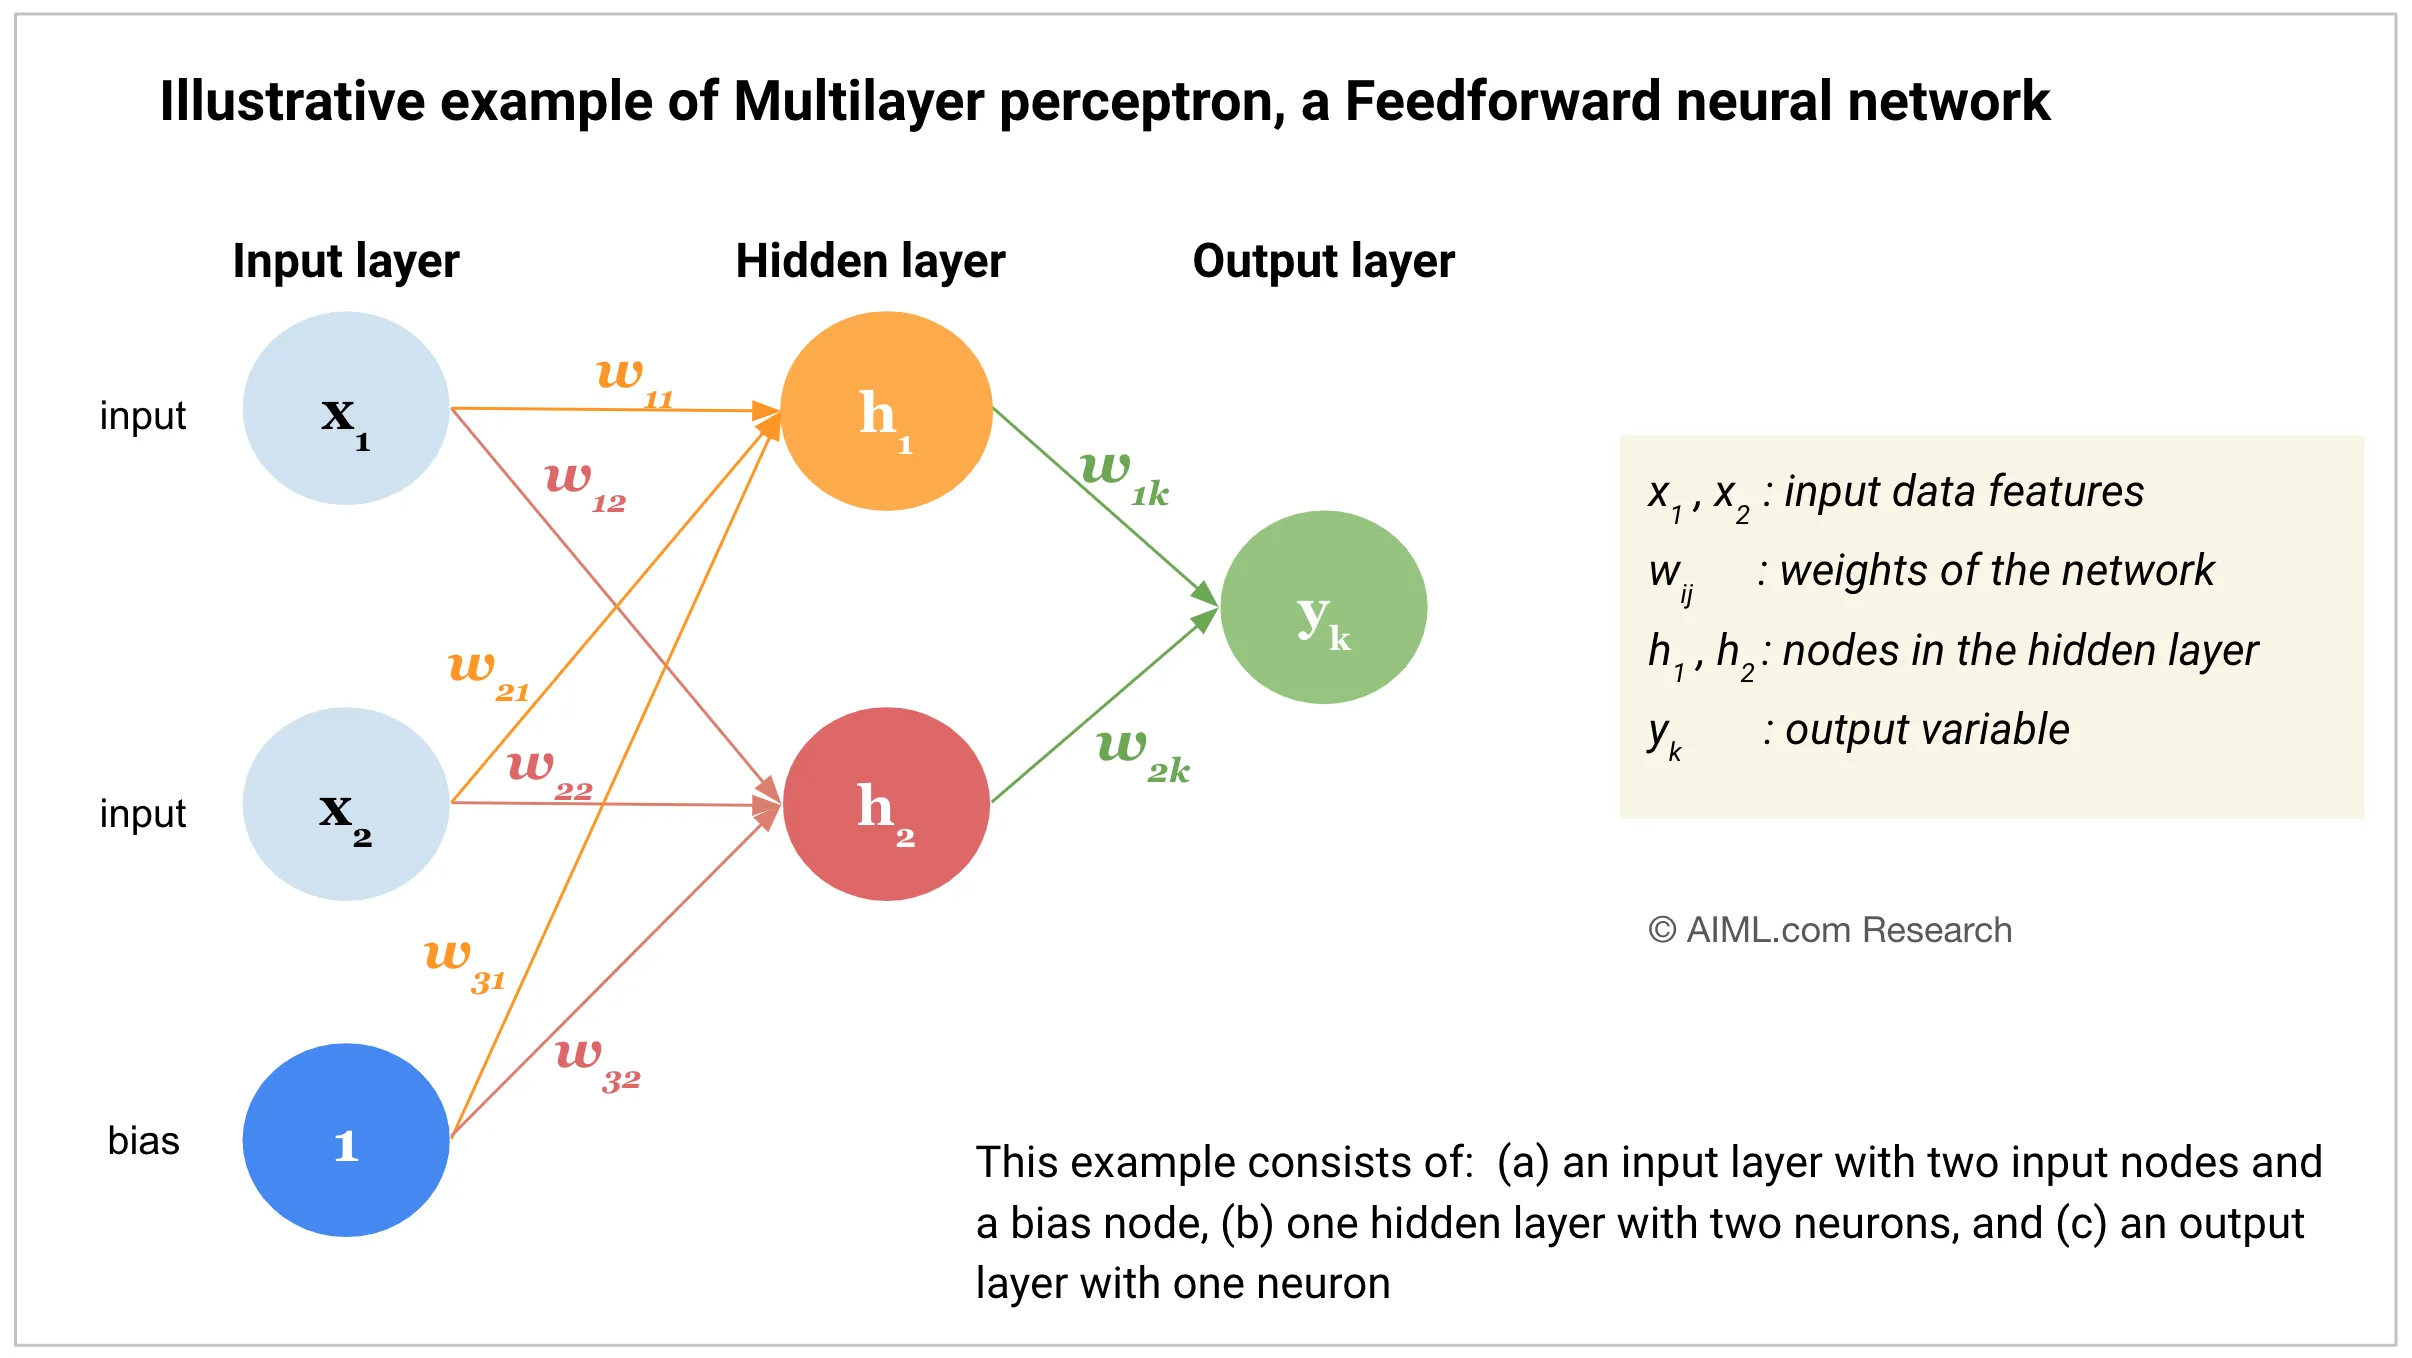

Un perceptrón multicapa (MLP) es un tipo de red neuronal que consta de múltiples capas de neuronas, incluida una capa de entrada, una o más capas ocultas y una capa de salida. Cada neurona de las capas ocultas está conectada a todas las neuronas de la capa anterior y cada conexión tiene un peso asociado. Los MLP se pueden utilizar tanto para problemas de clasificación como de regresión.

# Sklearn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cargar el conjunto de datos Iris
data = load_iris()
# Extraer las características (atributos) y las etiquetas del conjunto de datos
X = data.data  # X contiene las características de las flores
y = data.target  # y contiene las etiquetas correspondientes a las especies de flores

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
# Se utiliza random_state=1 para hacer la división reproducible
# test_size=0.2 indica que el 20% de los datos se reservarán para el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# Inicializar un objeto StandardScaler para estandarizar las características
sc_X = StandardScaler()

# Aplicar la estandarización a las características del conjunto de entrenamiento
X_trainscaled = sc_X.fit_transform(X_train)

# Aplicar la misma transformación de estandarización al conjunto de prueba
X_testscaled = sc_X.transform(X_test)

In [ ]:
#Crear y entrenar un modelo de perceptrón multicapa (MLP)
# hidden_layer_sizes=(256,128,64,32) especifica la arquitectura de la red con capas ocultas de 256, 128, 64 y 32 neuronas respectivamente.
# activation="relu" utiliza la función de activación ReLU en las capas ocultas.
# random_state=1 asegura la reproducibilidad del entrenamiento.
clf = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation="relu", random_state=1).fit(X_trainscaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_testscaled)

# Imprimir la precisión del modelo en el conjunto de prueba
print("Precisión del modelo en el conjunto de prueba:", clf.score(X_testscaled, y_test))

Precisión del modelo en el conjunto de prueba: 0.9666666666666667


1/1 [==============================] - 0s 21ms/step


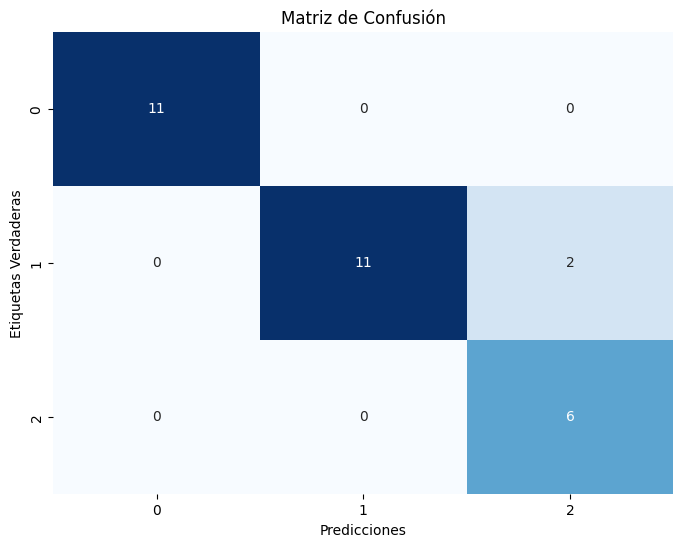

In [ ]:
#@title Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir las predicciones de probabilidades a clases (etiquetas)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión utilizando seaborn y matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

# Tensorflow

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.datasets import load_iris  # Importa el conjunto de datos Iris
from sklearn.model_selection import train_test_split  # Importa la función para dividir los datos en conjuntos de entrenamiento y prueba
import tensorflow as tf # Importar la biblioteca TensorFlow y el módulo Keras

In [ ]:
# Cargar el conjunto de datos Iris
data = load_iris()
# Extraer las características (atributos) y las etiquetas del conjunto de datos
X = data.data  # X contiene las características de las flores
y = data.target  # y contiene las etiquetas correspondientes a las especies de flores

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
# Se reserva el 20% de los datos para el conjunto de prueba (test_size=0.2)
# El parámetro random_state=42 asegura que la división sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Después de ejecutar este código, X_train y X_test contendrán las características de entrenamiento y prueba, respectivamente,
# mientras que y_train e y_test contendrán las etiquetas correspondientes a esos conjuntos de datos.

In [ ]:

# Capa de entrada con 4 características (shape=(4,))
inputs = tf.keras.layers.Input(shape=(4,))

# Capa completamente conectada (Dense) con 3 neuronas de salida y activación softmax
# La activación softmax se utiliza comúnmente en problemas de clasificación para obtener probabilidades normalizadas
# para cada clase, asegurando que la suma de las probabilidades sea igual a 1.
outputs = tf.keras.layers.Dense(3, activation="softmax")(inputs)


In [ ]:
# Capa completamente conectada (Dense) con 10 neuronas y activación ReLU
# Esta es la primera capa oculta de la red neuronal, conectada a la capa de entrada.
# La función de activación ReLU (Rectified Linear Unit) introduce no linealidades en la red.
hidden1 = tf.keras.layers.Dense(10, activation="relu")(inputs)

# Definir otra capa completamente conectada (Dense) con 10 neuronas y activación ReLU
# Esta es la segunda capa oculta de la red neuronal, conectada a la primera capa oculta.
# La red neuronal está tomando características abstractas de la primera capa oculta y creando
# representaciones más complejas en esta segunda capa.
hidden2 = tf.keras.layers.Dense(10, activation="relu")(hidden1)

# Definir la capa de salida con 3 neuronas y activación softmax
# Esta capa de salida produce la salida final de la red, y la activación softmax es comúnmente
# utilizada en problemas de clasificación para obtener probabilidades normalizadas para cada clase.
outputs = tf.keras.layers.Dense(3, activation="softmax")(hidden2)


In [ ]:
# Crear un modelo utilizando Keras
# El modelo toma 'inputs' como entrada y produce 'outputs' como salida
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compilar el modelo
# Se utiliza el optimizador "adam", una opción popular que adapta automáticamente la tasa de aprendizaje.
# La función de pérdida es "sparse_categorical_crossentropy", adecuada para problemas de clasificación con etiquetas enteras.
# La métrica de evaluación del modelo es la "accuracy" (exactitud), que mide la precisión del modelo en los datos de entrenamiento.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:
# Entrenar el modelo utilizando los datos de entrenamiento (X_train, y_train)
# El entrenamiento se realiza durante 100 épocas (epochs).
# Se utiliza el conjunto de validación (X_test, y_test) para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 1s 139ms/step - loss: 4.1080 - accuracy: 0.3333 - val_loss: 4.5162 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 3.8765 - accuracy: 0.3583 - val_loss: 4.2790 - val_accuracy: 0.5333
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 3.6821 - accuracy: 0.6250 - val_loss: 4.0585 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 3.4883 - accuracy: 0.5750 - val_loss: 3.8517 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 3.3101 - accuracy: 0.4833 - val_loss: 3.6482 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 3.1176 - accuracy: 0.5417 - val_loss: 3.4502 - val_accuracy: 0.4667
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 2.9592 - accuracy: 0.6250 - val_loss: 3.2498 - val_accuracy: 0.6333
Epoch 8/100
4/4 [==

In [ ]:
# Evaluar el modelo en el conjunto de prueba (X_test, y_test)
# 'model.evaluate' devuelve la pérdida y la precisión (accuracy) del modelo en el conjunto de prueba.
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

1/1 [==============================] - 0s 28ms/step - loss: 0.3359 - accuracy: 0.9667
Loss: 0.3358902633190155
Accuracy: 0.9666666388511658


1/1 [==============================] - 0s 78ms/step


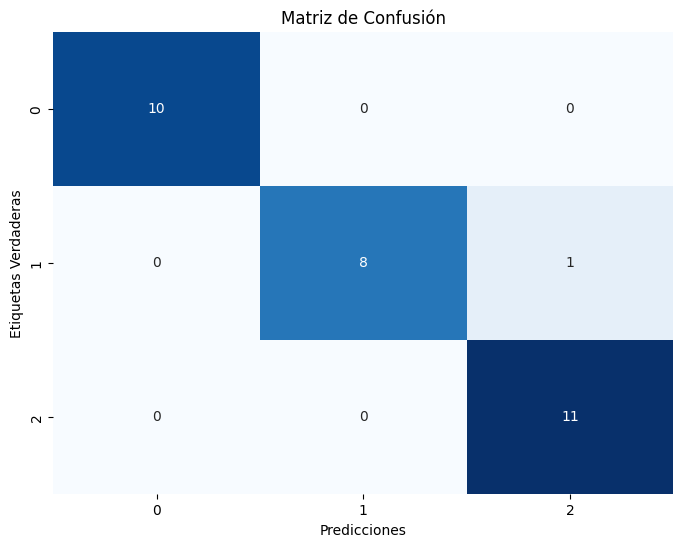

In [ ]:
#@title Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir las predicciones de probabilidades a clases (etiquetas)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión utilizando seaborn y matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()
